In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import json, os
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from RiboGraphViz import RGV
from RiboGraphViz import LoopExtruder, StackExtruder
from ipynb.draw import draw_struct

from nnn import util, fileio, plotting

cm = 1/2.54
px = 1/plt.rcParams['figure.dpi']
tick_font_size = 5
label_font_size = 6

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# make sure the text is editable in illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set font to arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

## Me trying to save draw RNA to a smaller size and get rid of the gray things

In [20]:
import os
def save_fig(filename, fig=None, dpi=300):

    figdir, _ = os.path.split(filename)
    if not os.path.isdir(figdir):
        os.makedirs(figdir)

    if fig is None:
        plt.savefig(filename, dpi=dpi, bbox_inches='tight', transparent=True)
    else:
        fig.savefig(filename, dpi=dpi, bbox_inches='tight', transparent=True)
        
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

In [22]:
with open('./data/figure/allclasses.txt', 'r') as fh:
    allclasses = fh.readlines()

In [23]:
if len(allclasses) % 5 == 4:
    allclasses.append('\n')
classes_arr = np.array([s.strip('\n') for s in allclasses]).reshape(-1, 5)[:,:4]

In [24]:
df = pd.DataFrame(data=classes_arr, columns=['seqname', 'sequence', 'structure', 'color'])

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_81967/1135693835.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(4,5))


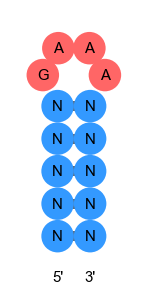

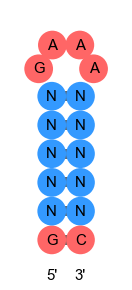

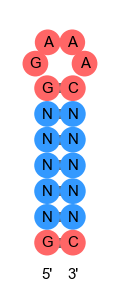

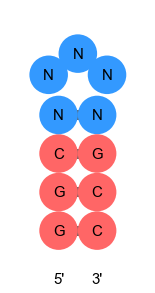

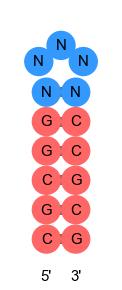

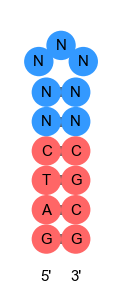

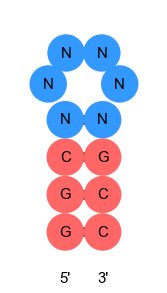

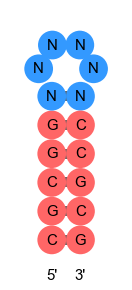

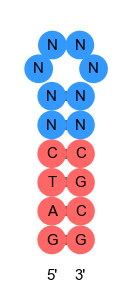

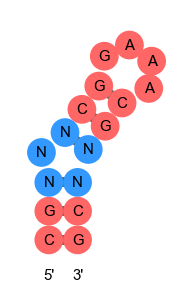

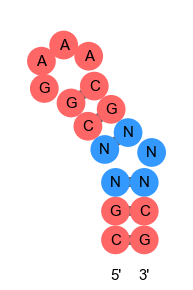

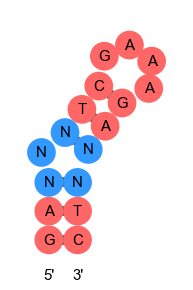

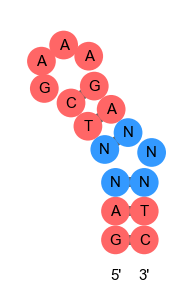

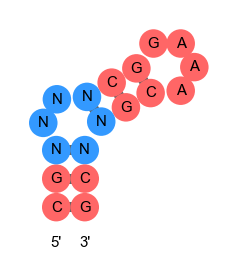

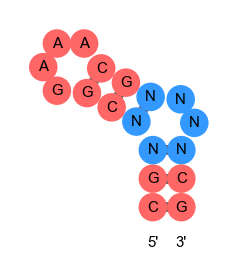

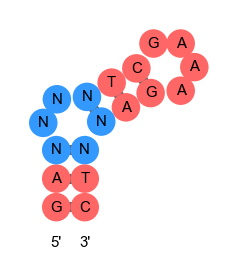

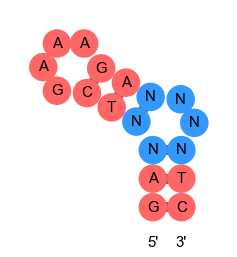

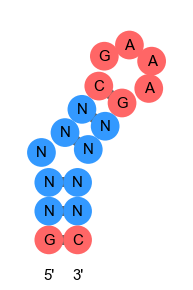

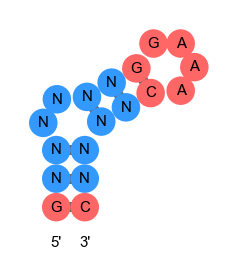

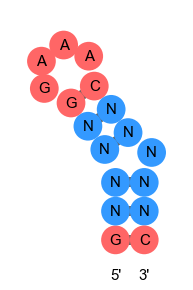

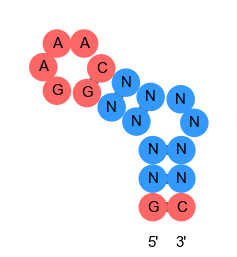

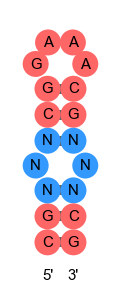

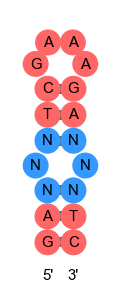

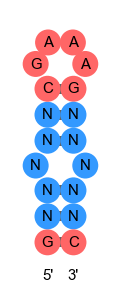

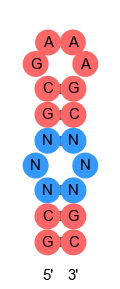

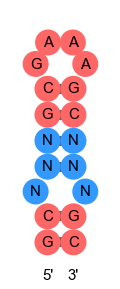

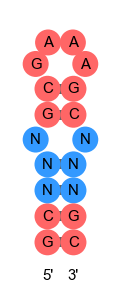

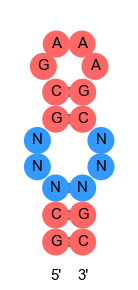

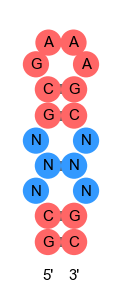

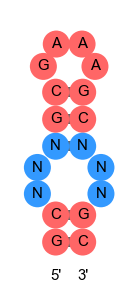

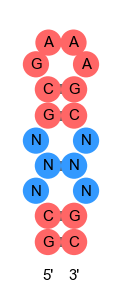

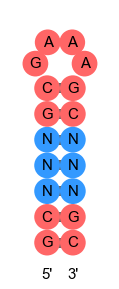

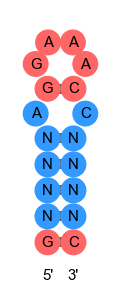

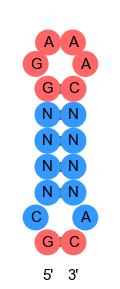

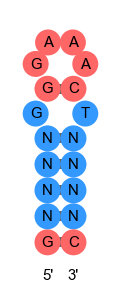

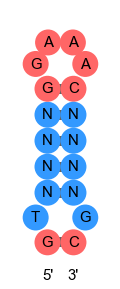

In [25]:
figdir = './fig/allclasses/'
    
for i,row in df.iterrows():

    filename = figdir + row.seqname + '.svg'
    fig, ax = plt.subplots(figsize=(4,5))
    draw_struct(row.sequence, row.structure, row.color, ax=ax)
    save_fig(filename, fig, dpi=300)

## Class sizes

In [2]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 433.

values = [500, 433, 78, 25, 25, 7]

# values must be sorted descending (and positive, obviously)
values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

In [97]:
from nnn.arraydata import ArrayData
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                      annotation_file='./data/annotation/NNNlib2b_annotation_20220418.tsv')
annotation = pd.read_table('./data/annotation/NNNlib2b_annotation_20220418.tsv')

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.41% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
80.98% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
81.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


In [15]:
annotation.query("ConstructType == '3mer'").TargetStruct.apply(lambda s: (s.count(".") - 4) / 2 == 0).sum()

192

In [32]:
annotation['Scaffold'] = annotation.apply(lambda r: str(r.bottomScaffold) + '/' + str(r.topScaffold), axis=1)

In [48]:
annotation.query("Series == 'Bulges' & ConstructType == 'NN_3primebulge'").TargetStruct.apply(lambda s: (s.count(".") - 4) == 2).sum()*2

1024

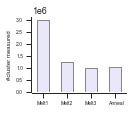

In [104]:
fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
xlabels = ['Melt%d'%(i+1) for i in range(3)] + ['Anneal']
plt.bar(xlabels, arraydata.data_all[[c for c in arraydata.data_all.columns if c.startswith('n_clusters')]].sum(axis=0),
       fill=True, edgecolor='k', alpha=.9, color='lavender', linewidth=0.5, width=.5)
# plt.yscale('log')
sns.despine(trim=False, offset=1)
ax.set_ylabel('#cluster measured', size=label_font_size)
ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
util.save_fig('./fig/accounting/number_clusters.pdf')

In [247]:
df = arraydata.data.join(annotation.set_index('SEQID'))
df['dG_37_bin'] = pd.qcut(df.dG_37, 5, precision=0)
df['dG_37_se_bin'] = pd.cut(df.dG_37_se, 8, precision=0)

major_series = annotation.groupby('Series').apply(len)
major_series = pd.DataFrame(major_series, columns=['Series_size'])
df = df.join(major_series, on='Series')

In [251]:
series_size

Series
Bulges         9891
MisMatches     9728
TETRAloop      5698
TRIloop        1439
WatsonCrick    2744
dtype: int64

In [256]:
se_bin_norm_df.set_index('Series').sum(axis=1)

Series
Bulges         100.0
MisMatches     100.0
TETRAloop      100.0
TRIloop        100.0
WatsonCrick    100.0
dtype: float64

In [248]:
series_size = df.query("Series_size > 1000").groupby('Series').apply(len)
se_bin_df = pd.DataFrame(index=series_size.index, columns =np.unique(df.dG_37_se_bin))
for s in series_size.index:
    se_bin_size = df.query("Series_size > 1000").query("Series == '%s'"%s).groupby('dG_37_se_bin').apply(len)
    se_bin_df.loc[s, :] = se_bin_size

se_bin_norm_df = se_bin_df / series_size.values.reshape(-1,1) * 100
se_bin_norm_df = se_bin_norm_df.reset_index()
se_bin_norm_df

,Series,"(0.03, 0.3]","(0.3, 0.5]","(0.5, 0.7]","(0.7, 1.0]","(1.0, 1.2]","(1.2, 1.5]","(1.5, 1.7]","(1.7, 1.9]"
0,Bulges,91.123243,6.207664,1.567081,0.707714,0.232535,0.141543,0.02022,0.0
1,MisMatches,86.657072,9.004934,2.261513,1.058799,0.555099,0.400905,0.051398,0.01028
2,TETRAloop,85.538786,11.618112,2.193752,0.4212,0.12285,0.0702,0.0351,0.0
3,TRIloop,85.267547,12.439194,1.945796,0.138985,0.138985,0.069493,0.0,0.0
4,WatsonCrick,75.145773,16.107872,5.867347,1.348397,0.911079,0.437318,0.145773,0.036443


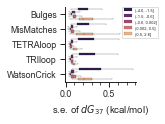

In [108]:
fig, (ax, lax) = plt.subplots(1, 2, figsize=(4.25*cm, 3.5*cm), gridspec_kw={"width_ratios":[5,1]})
# fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
sns.boxplot(data=df.query("Series_size > 1000"), orient='h', x='dG_37_se', y='Series', hue='dG_37_bin', 
            showfliers = False, palette='magma', linewidth=0.25, ax=ax)

ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('s.e. of $dG_{37}$ (kcal/mol)')
plt.yticks(fontsize=3)
ax.xaxis.set_minor_locator(MultipleLocator(0.4))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
sns.despine(trim=False)

h,l = ax.get_legend_handles_labels()
lax.legend(h,l, borderaxespad=0, prop={'size': 4})
lax.axis("off")
util.save_fig('./fig/uncertainty_breakdown/dG_se_by_series.pdf')

(0.8912509381337456, 11.220184543019636, 0.0, 1.0)

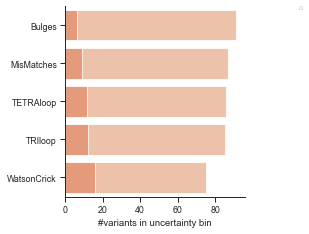

In [258]:
# fig, (ax, lax) = plt.subplots(1, 2, figsize=(4.25*cm, 3.5*cm), gridspec_kw={"width_ratios":[5,1]})
fig, (ax, lax) = plt.subplots(1, 2, figsize=(4.25, 3.5), gridspec_kw={"width_ratios":[5,1]})

for i,se_bin in enumerate(se_bin_df.columns[:2]):
    sns.barplot(data=se_bin_norm_df.reset_index(), orient='h', y='Series', x=se_bin, color=sns.color_palette('rocket_r', 8)[i], 
                ax=ax)

# ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('#variants in uncertainty bin')
# plt.yticks(fontsize=3)
# ax.xaxis.set_minor_locator(MultipleLocator(25))
# ax.xaxis.set_minor_locator(MultipleLocator(5))
sns.despine(trim=False)
plt.xscale('log')
h,l = ax.get_legend_handles_labels()
lax.legend(h,l, borderaxespad=0, prop={'size': 4})
lax.axis("off")
# util.save_fig('./fig/uncertainty_breakdown/dG_se_by_series_stacked_bar.pdf')

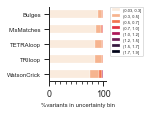

In [294]:
cross_tab_prop = pd.crosstab(index=df.query("Series_size > 1000").Series, columns=df.query("Series_size > 1000").dG_37_se_bin, normalize='index') * 100

fig, (ax, lax) = plt.subplots(1, 2, figsize=(4.25*cm, 3.5*cm), gridspec_kw={"width_ratios":[2,1]})
cross_tab_prop.iloc[::-1].plot(kind='barh', 
                    stacked=True, 
                    colormap='rocket_r', 
                    linewidth=0.25,
                    ax=ax)

ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('%variants in uncertainty bin', fontsize=label_font_size)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=label_font_size)

ax.xaxis.set_minor_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=label_font_size)
h,l = ax.get_legend_handles_labels()
lax.legend(h,l, borderaxespad=0, prop={'size': 4})
lax.axis("off")

sns.despine()
util.save_fig('./fig/uncertainty_breakdown/dG_se_bin_by_series.pdf')

In [297]:
kB = 0.0019872
0.3 / (kB * (273.15 + 37))

0.4867521637107181

(-0.1, 0.8)

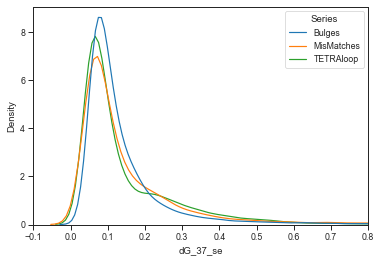

In [244]:
sns.kdeplot(data=df.query("Series_size > 5000"), x='dG_37_se', hue='Series', fill=False, common_norm=False)
plt.xlim([-.1, .8])

<AxesSubplot:>

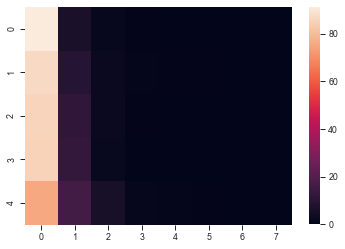

In [233]:
sns.heatmap(se_bin_norm_df.set_index('Series').values.astype(float))

# Example curves

In [2]:
from nnn.arraydata import ArrayData

replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
annotation_file = './data/annotation/NNNlib2b_annotation_20220418.tsv'
arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                      annotation_file=annotation_file)
revdata = ArrayData(replicate_df=replicate_df.iloc[3,:],
                   annotation_file='./data/annotation/NNNlib2b_annotation_20220418.tsv')
saltdata = ArrayData(replicate_df=replicate_df.iloc[4,:],
                    annotation_file=annotation_file)
annotation = pd.read_table(annotation_file)

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.41% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
80.98% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
81.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
31.22% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


In [16]:
# r1 = arraydata.get_replicate_data('r1', attach_annotation=True)

def plot_3_example_curves(seqid_list, repdata, figname=None):
    palette=['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#deb887','#ff8c00','#8b4513','#ff0000','#ff69b4','#800080',]
    
    fig, ax = plt.subplots(1,3, figsize=(3*4.25*cm, 3.5*cm), sharey=True)
    ax = ax.flatten()

    for i in range(len(seqid_list)):
        plotting.plot_actual_and_expected_fit(r1.loc[seqid_list[i],:], ax[i], c=palette[i+6])
        ax[i].set_title('GC = %.1f%%'%repdata.loc[seqid_list[i], 'GC'], fontsize=label_font_size, fontweight='bold')

        ax[i].xaxis.set_major_locator(MultipleLocator(20))
        ax[i].xaxis.set_minor_locator(MultipleLocator(5))
        ax[i].yaxis.set_major_locator(MultipleLocator(0.5))
        ax[i].yaxis.set_minor_locator(MultipleLocator(0.25))

        sns.despine(trim=False)

        ax[i].tick_params(axis='both', which='major', labelsize=tick_font_size)
        ax[i].set_xlabel('temperature (°C)', fontsize=tick_font_size)
        if i == 0:
            ax[i].set_ylabel('normalized fluorescence (a.u.)', fontsize=tick_font_size)

    util.save_fig('./fig/example_curves/curves_3.pdf')
    plt.show()

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_63338/453348578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GC'] = df.RefSeq.apply(util.get_GC_content)
/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_63338/453348578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='GC', inplace=True)


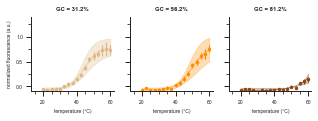

In [17]:
df = r1.query('Series == "WatsonCrick" & ConstructType == "WC_6ntstem" & RMSE < 0.08')
df['GC'] = df.RefSeq.apply(util.get_GC_content)
df.sort_values(by='GC', inplace=True)

seqid_list = [df.index[0], df.index[len(df) // 2 + 16], df.index[-1]]
plot_3_example_curves(seqid_list, r1)

Interpreting color string as integer values
Interpreting color string as integer values
Interpreting color string as integer values


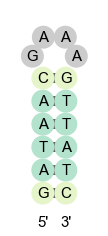

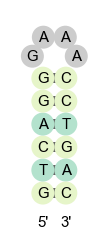

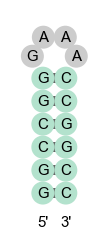

In [100]:
""" Make some cartoons for the example curves
"""
for seqid in seqid_list:
    seq = r1.loc[seqid, 'RefSeq']
    gc_coding = seq.replace('GAAA','2222').replace('G','1').replace('C','1').replace('A','0').replace('T','0')
    
    fig, ax = plt.subplots()
    draw_struct(seq, r1.loc[seqid, 'TargetStruct'], gc_coding, cmap='Pastel2', ax=ax)
    util.save_fig(f'./fig/example_curves/structs/{seqid}_structure.svg', fig=fig)

# Error binned on param

In [46]:
df = arraydata.data.join(annotation.set_index('SEQID'))

# Bin on param
df['dG_37_bin'] = pd.qcut(df.dG_37, 5, precision=0)
# df['Tm_bin'] = pd.cut(df.Tm, 5)

# Annotate Series size for later filtering
major_series = annotation.groupby('Series').apply(len)
major_series = pd.DataFrame(major_series, columns=['Series_size'])
df = df.join(major_series, on='Series')

# Rename the Series
series_rename_dict = {s: s.title() for s in np.unique(df['Series'].values.astype('str'))}
series_rename_dict["WatsonCrick"] = "Watson Crick"
df = df.replace({'Series': series_rename_dict})

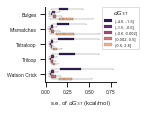

In [48]:
fig, (ax, lax) = plt.subplots(1, 2, figsize=(4.25*cm, 3.5*cm), gridspec_kw={"width_ratios":[5,1]})
# fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
sns.boxplot(data=df.query("Series_size > 1000"), orient='h', x='dG_37_se', y='Series', hue='dG_37_bin', 
            showfliers = False, palette='magma', linewidth=0.25, ax=ax)

ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('s.e. of $dG_{37}$ (kcal/mol)', size=label_font_size)
# ax.xaxis.set_minor_locator(MultipleLocator(0.4))
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
sns.despine(trim=False)

h,l = ax.get_legend_handles_labels()
lax.legend(h,l, borderaxespad=0, prop={'size': 4}, title='$dG_{37}$', title_fontsize=label_font_size)
lax.axis("off")
util.save_fig('./fig/uncertainty_breakdown/dG_se_by_series.pdf')

# Length dependency

In [20]:
datadir = './data/'
r2_series = pd.read_pickle(os.path.join(datadir, 'series_merged/NNNlib2b_DNA_20211221.pkl'))

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_63338/3813930082.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_series['polyT'] = repeat_series.RefSeq.apply(is_polyT)
/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_63338/3813930082.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_series['length'] = repeat_series.RefSeq.apply(len)


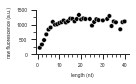

In [25]:
"""
Pooled repeatseries and polyA
"""
def is_polyA(refseq):
    return refseq.count('A') == len(refseq)

def is_polyT(refseq):
    return refseq.count('T') == len(refseq)


repeat_series = r2_series.query('Series == "REPeatControls" | Series == "PolyNTControls"')
repeat_series['polyT'] = repeat_series.RefSeq.apply(is_polyT)
repeat_series = repeat_series[np.logical_not(repeat_series.polyT)]

repeat_series['length'] = repeat_series.RefSeq.apply(len)
length_dep = repeat_series[['length', 'Green20_40.0']].groupby('length').apply(np.nanmean)
length_dep = length_dep#[:20]

fig, ax = plt.subplots(figsize=(4.25*cm, 0.6*3.5*cm))
sns.scatterplot(x=length_dep.index, y=length_dep, color='k', size=length_dep.index, sizes=(20,20))
ax.get_legend().remove()
sns.despine(trim=False)
ax.set_xlabel('length (nt)', fontsize=tick_font_size)
ax.set_ylabel('raw fluorescence (a.u.)', fontsize=tick_font_size)
ax.set_ylim(bottom=0, top=1500)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(250))

plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

util.save_fig('./fig/length_dependency/length_dependency_repeats_and_polyA.pdf')

In [30]:
meltdata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                      annotation_file=annotation_file)
revdata = ArrayData(replicate_df=replicate_df.iloc[3,:],
                   annotation_file='./data/annotation/NNNlib2b_annotation_20220418.tsv')
df = meltdata.data.join(revdata.data, lsuffix='_heating', rsuffix='_cooling')

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.41% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
80.98% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
81.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
81.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


CPU times: user 7.16 s, sys: 412 ms, total: 7.57 s
Wall time: 5.86 s


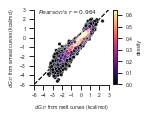

In [31]:
%%time
from scipy.stats import pearsonr

# orange_palette = sns.dark_palette(palette[6], reverse=False, as_cmap=True)

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
lim = [-5, 3]
l = lim[1] - lim[0]
df = df.dropna()
pearson, _ = pearsonr(df['dG_37_heating'], df['dG_37_cooling'])
plotting.plot_colored_scatter_comparison(data=df, x='dG_37_heating', y='dG_37_cooling',
                                         palette='magma', lim=lim, alpha=.9, ax=ax)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_xlabel('$dG_{37}$ from melt curves (kcal/mol)', fontsize=tick_font_size)
ax.set_ylabel('$dG_{37}$ from anneal curves (kcal/mol)', fontsize=tick_font_size)

ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
sns.despine(offset=0)

plt.text(lim[0] + 0.05*l, lim[1] - 0.1*l, r"$Pearson's\ r = %.3f$"%pearson, va='bottom', fontsize=label_font_size)

util.save_fig('./fig/heat_cool/relplot_heat_cool.pdf')

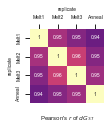

In [29]:
corr_mat = plotting.get_pairwise_pearsonr_matrix([ arraydata.data_all[['dG_37-r1']],
                                                   arraydata.data_all[['dG_37-r2']],
                                                   arraydata.data_all[['dG_37-r3']],
                                                   revdata.data[['dG_37']],
                                                   ])
ticks = ['Melt1', 'Melt2', 'Melt3', 'Anneal']
# mask = np.zeros_like(corr_mat)
# mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
im = sns.heatmap(corr_mat, vmin=0.92, vmax=0.99, 
                 cmap='magma', cbar=False, linewidths=0, square=True,
                annot=True, annot_kws={'size': 5})
ax.set_xticklabels(ticks, size=tick_font_size)
ax.set_yticklabels(ticks, size=tick_font_size)
ax.set_xlabel('replicate', size=tick_font_size)
ax.set_ylabel('replicate', size=tick_font_size)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set_title("Pearson's $r$ of $dG_{37}$", y=-.3, size=label_font_size)

util.save_fig('./fig/heat_cool/corr_mat.pdf')

# Box plot

In [32]:
import kaleido

import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'jupyterlab'

/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



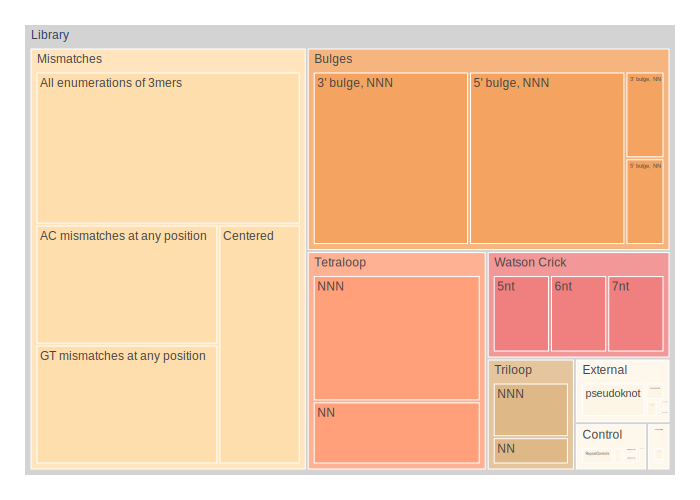

In [33]:
warm_palette = ['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]
mpl_palette = ["navajowhite", "sandybrown", "lightsalmon", "lightcoral", "burlywood","oldlace", "oldlace", "oldlace"]
df = annotation[['Series', 'ConstructType']]
series_rename_dict = {s: s.title() for s in np.unique(df.Series)}
series_rename_dict["WatsonCrick"] = "Watson Crick"
# series_rename_dict["External"] = "Control"
rename_dict = dict(AC_mismatch_varpos='AC mismatches at any position',
                   GT_mismatch_varpos='GT mismatches at any position',
                   NNN_3primebulge="3' bulge, NNN", NNN_5prime_bulge="5' bulge, NNN",
                   NN_3primebulge="3' bulge, NN", NN_5primebulge="5' bulge, NN",
                   WC_5ntstem='5nt', WC_6ntstem='6nt', WC_7ntstem='7nt',
                   pseudoknot_pt_muts='pseudoknot')
rename_dict['3mer'] = 'All enumerations of 3mers'

df = df.replace({"ConstructType": rename_dict, 'Series': series_rename_dict})

fig = px.treemap(df, path=[px.Constant("Library"), 'Series', 'ConstructType'])
fig.update_traces(root_color="lightgray")
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout(
    font_family = "Arial",
    treemapcolorway = mpl_palette,#warm_palette[6:14],
    margin = dict(t=25, l=25, r=25, b=25)
)
fig.show(renderer="svg")
fig.write_image('./fig/treemap/treemap.svg', engine='kaleido')

In [307]:
arr = arraydata.data.join(arraydata.annotation)

In [308]:
arr.columns

Index(['dH', 'dH_se', 'dH_lb', 'dH_ub', 'Tm', 'Tm_se', 'Tm_lb', 'Tm_ub',
       'dG_37', 'dG_37_se', 'dG_37_lb', 'dG_37_ub', 'dS', 'dS_se', 'dS_lb',
       'dS_ub', 'fmax', 'fmax_se', 'fmax_lb', 'fmax_ub', 'fmin', 'fmin_se',
       'fmin_lb', 'fmin_ub', 'Series', 'ConstructType', 'bottomScaffold',
       'topScaffold', 'RefSeq', 'dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK',
       'dG_37_ensemble_NUPACK', 'TargetStruct', 'dG_37_NUPACK',
       'dG_37_ensemble_150mM_NUPACK', 'dG_37_ensemble_75mM_NUPACK', 'GC',
       'Tm_NUPACK_salt_corrected', 'dG_37_NUPACK_salt_corrected',
       'dH_NUPACK_salt_corrected', 'dS_NUPACK_salt_corrected'],
      dtype='object')

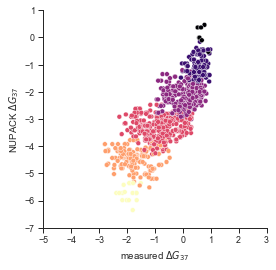

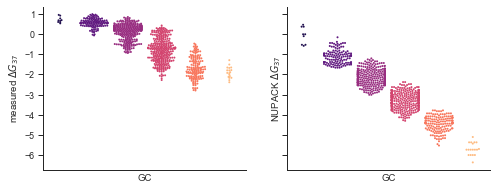

In [362]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=arr.query('Series == "WatsonCrick" & ConstructType == "WC_5ntstem"'), 
                x='dG_37', y='dG_37_NUPACK_salt_corrected', hue='GC', palette='magma')
lim = [-7,1]
ax.set_xlim(np.array(lim)+2)
ax.set_ylim(lim)
ax.get_legend().remove()
ax.set_xlabel('measured $\Delta G_{37}$')
ax.set_ylabel('NUPACK $\Delta G_{37}$')
sns.despine()
util.save_fig('./fig/NUPACK/scatter_GC_compare.pdf')

fig, ax = plt.subplots(1,2,figsize=(8,3), sharey=True)
sns.swarmplot(data=arr.query('Series == "WatsonCrick" & ConstructType == "WC_5ntstem"'), y='dG_37', x='GC', 
              size=2, palette='magma', ax=ax[0])
sns.swarmplot(data=arr.query('Series == "WatsonCrick" & ConstructType == "WC_5ntstem"'), y='dG_37_NUPACK_salt_corrected', x='GC', 
              size=2, palette='magma', ax=ax[1])
ax[0].set_ylabel('measured $\Delta G_{37}$')
ax[1].set_ylabel('NUPACK $\Delta G_{37}$')
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
sns.despine()
util.save_fig('./fig/NUPACK/GC_compare.pdf')

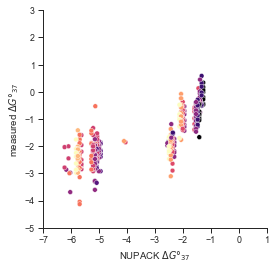

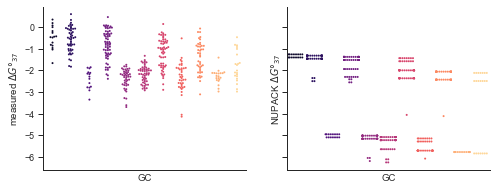

In [372]:
df = arr.query('Series == "TRIloop" & ConstructType == "NN"')

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=df, 
                y='dG_37', x='dG_37_NUPACK_salt_corrected', hue='GC', palette='magma')
lim = [-7,1]
ax.set_xlim(np.array(lim)+0)
ax.set_ylim(np.array(lim)+2)
ax.get_legend().remove()
ax.set_ylabel('measured $\Delta G°_{37}$')
ax.set_xlabel('NUPACK $\Delta G°_{37}$')
sns.despine()
util.save_fig('./fig/NUPACK/scatter_GC_compare_triloop.pdf')

fig, ax = plt.subplots(1,2,figsize=(8,3), sharey=True)
sns.swarmplot(data=df, y='dG_37', x='GC', 
              size=2, palette='magma', ax=ax[0])
sns.swarmplot(data=df, y='dG_37_NUPACK_salt_corrected', x='GC', 
              size=2, palette='magma', ax=ax[1])
ax[0].set_ylabel('measured $\Delta G°_{37}$')
ax[1].set_ylabel('NUPACK $\Delta G°_{37}$')
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
sns.despine()
util.save_fig('./fig/NUPACK/GC_compare_triloop.pdf')

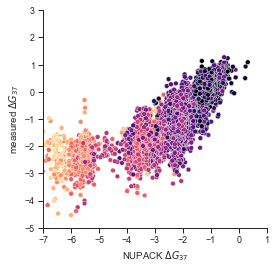

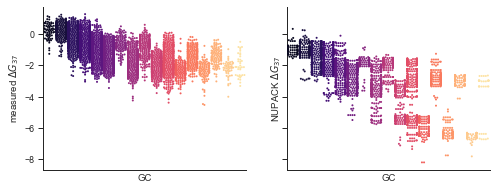

In [369]:
df = arr.query('Series == "TETRAloop"')

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=df, 
                y='dG_37', x='dG_37_NUPACK_salt_corrected', hue='GC', palette='magma')
lim = [-7,1]
ax.set_xlim(np.array(lim)+0)
ax.set_ylim(np.array(lim)+2)
ax.get_legend().remove()
ax.set_ylabel('measured $\Delta G_{37}$')
ax.set_xlabel('NUPACK $\Delta G_{37}$')
sns.despine()
util.save_fig('./fig/NUPACK/scatter_GC_compare_tetraloop.pdf')

fig, ax = plt.subplots(1,2,figsize=(8,3), sharey=True)
sns.swarmplot(data=df, y='dG_37', x='GC', 
              size=2, palette='magma', ax=ax[0])
sns.swarmplot(data=df, y='dG_37_NUPACK_salt_corrected', x='GC', 
              size=2, palette='magma', ax=ax[1])
ax[0].set_ylabel('measured $\Delta G_{37}$')
ax[1].set_ylabel('NUPACK $\Delta G_{37}$')
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
sns.despine()
util.save_fig('./fig/NUPACK/GC_compare_tetraloop.pdf')

In [370]:
arr.query('Series == "TRIloop"').ConstructType

SEQID
TRINN0        NN
TRINN1        NN
TRINN10       NN
TRINN100      NN
TRINN101      NN
            ... 
TRINNN995    NNN
TRINNN996    NNN
TRINNN997    NNN
TRINNN998    NNN
TRINNN999    NNN
Name: ConstructType, Length: 1439, dtype: object

In [306]:
arr.Series

SEQID
BC0      NaN
BC1      NaN
BC2      NaN
BC3      NaN
BC4      NaN
        ... 
WC994    NaN
WC995    NaN
WC997    NaN
WC998    NaN
WC999    NaN
Name: Series, Length: 29686, dtype: object